### Simulated

In [106]:
from scipy.ndimage.filters import gaussian_filter
from statsmodels.nonparametric.kde import kdensityfft
from matplotlib import cm
from PIL import Image
from itertools import product

In [2]:
plt = plotter()
%matplotlib inline

In [129]:
pixel = 15
size = 256
sigma = 2

In [130]:
norm = 300
eps = 1e-16

In [131]:
normalize = lambda x: x/(x+norm)
quantize = lambda x: (256*(x-eps)).astype(np.uint8)
rms = lambda x: np.sqrt(np.sum(x*x))

In [132]:
# generate firm locations
def gen_firms(NC, NF, CS, CW):
    c_cent = 0.5 + 0.25*np.random.randn(NC, 2)
    c_size = np.random.poisson(CS, size=NC)
    f_zero = 0.5 + 0.5*np.random.randn(NF, 2)
    f_ones = np.vstack([cc+CW*np.random.randn(cs, 2) for cc, cs in zip(c_cent, c_size)])
    f_locs = np.vstack([f_zero, f_ones])
    df = pd.DataFrame({'lon': f_locs[:,0], 'lat': f_locs[:,1]})
    df = df[(df['lon']>0)&(df['lon']<1)&(df['lat']>0)&(df['lat']<1)]
    return df

In [173]:
def gen_density(df):
    count, lon_bins, lat_bins = np.histogram2d(df['lon'], df['lat'], bins=size, range=((0, 1), (0, 1)))
    dens = count/(pixel/1e3)**2 # firms per square kilometer
    dens = gaussian_filter(dens, sigma=sigma)
    dimg = quantize(1-normalize(dens))
    return dimg

### Duranton

In [159]:
df_locs1 = gen_firms(1, 200, 100, 0.05)
df_locs2 = gen_firms(2, 100, 100, 0.05)

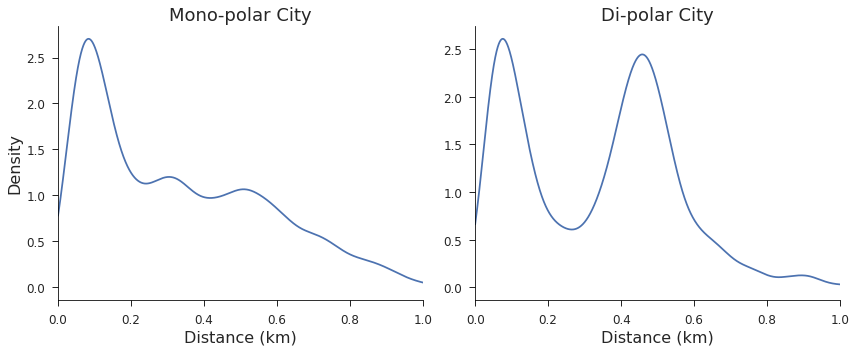

In [188]:
dist1 = pd.Series([rms(x-y) for x, y in product(df_locs1.values, df_locs1.values)])
dist2 = pd.Series([rms(x-y) for x, y in product(df_locs2.values, df_locs2.values)])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
kde_vals1, kde_grid1, kde_bw1 = kdensityfft(dist1.values)
kde_vals2, kde_grid2, kde_bw2 = kdensityfft(dist2.values)
ax1.plot(kde_grid1, kde_vals1);
ax2.plot(kde_grid2, kde_vals2);
ax1.set_xlim(0, 1);
ax2.set_xlim(0, 1);
ax1.set_xlabel('Distance (km)')
ax2.set_xlabel('Distance (km)')
ax1.set_ylabel('Density')
ax1.set_title('Mono-polar City')
ax2.set_title('Di-polar City')
fig.savefig('../slides/images/simulated_twopoint.svg')

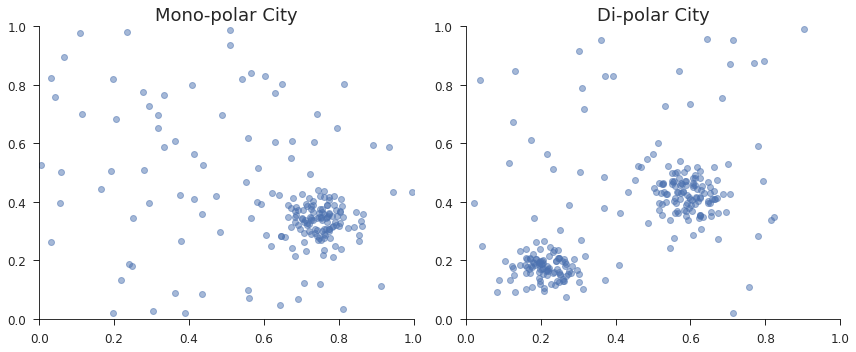

In [196]:
dimg1 = gen_density(df_locs1)
dimg2 = gen_density(df_locs2)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(*df_locs1.values.T, alpha=0.5)
ax2.scatter(*df_locs2.values.T, alpha=0.5)
ax1.set_xlim(0, 1)
ax2.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax2.set_ylim(0, 1)
ax1.set_title('Mono-polar City')
ax2.set_title('Di-polar City')
fig.savefig('../slides/images/simulated_scatter.svg')

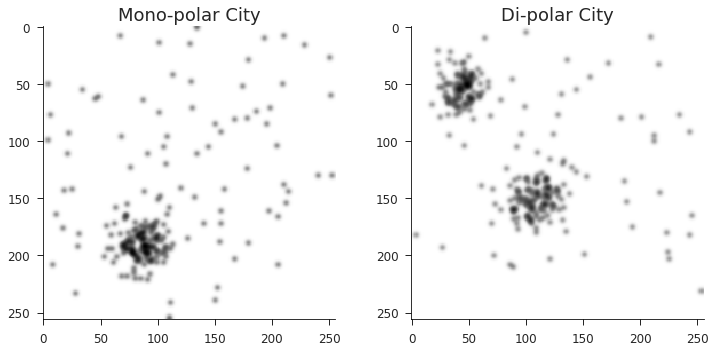

In [183]:
dimg1 = gen_density(df_locs1)
dimg2 = gen_density(df_locs2)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.imshow(dimg1, cmap=cm.Greys_r)
ax2.imshow(dimg2, cmap=cm.Greys_r)
ax1.set_title('Mono-polar City')
ax2.set_title('Di-polar City')
fig.savefig('../slides/images/simulated_density.svg')